### This notebook contains the codes to generate all the plots used in the manuscript.
### Author: Chop Yan Lee

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import seaborn as sns
import sqlalchemy, db_utils, glob, os, requests, itertools, re
from sklearn.metrics import roc_curve, auc, average_precision_score, roc_auc_score, precision_recall_curve, accuracy_score
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from pymol import cmd
from statannotations.Annotator import Annotator
plt.rcParams['axes.spines.top'] = False # remove top spine
plt.rcParams['axes.spines.right'] = False # remove right spine
plt.rcParams['pdf.fonttype'] = 42 # Set the fonttype to export fonts as font files
plt.rcParams['font.family'] = 'Arial'
sns.set_palette("colorblind")
global_fontsize = 12
figsize = (3,3)
legend_fontsize = 8
bbox_to_anchor =(1.0, 1.0)
connect = db_utils.get_connection()
save_path= '/Volumes/imb-luckgr/projects/dmi_predictor/DMI_AF2_PRS/Plots/mut_rand_min_ext_DMI/AF2_MMv2.2_v2.3_comparison/'

In [2]:
def modify_ticks_and_labels(ax,x_major_multiple=None,x_minor_multiple=None,
                            y_major_multiple=None,y_minor_multiple=None,change_markersize=False):
    global global_fontsize
    if x_major_multiple is not None:
        ax.tick_params(axis='x', which='both',labelsize=global_fontsize)
        ax.xaxis.set_major_locator(MultipleLocator(x_major_multiple))
        ax.xaxis.set_minor_locator(MultipleLocator(x_minor_multiple))
    if y_major_multiple is not None:
        ax.tick_params(axis='y', which='both',labelsize=global_fontsize)
        ax.yaxis.set_major_locator(MultipleLocator(y_major_multiple))
        ax.yaxis.set_minor_locator(MultipleLocator(y_minor_multiple))
    if change_markersize:
        plt.setp(ax.xaxis.get_majorticklines(), 'markersize', 5)
        plt.setp(ax.xaxis.get_majorticklines(), 'markeredgewidth', 2)
        plt.setp(ax.xaxis.get_minorticklines(), 'markersize', 3.5)
        plt.setp(ax.xaxis.get_minorticklines(), 'markeredgewidth', 2)
        plt.setp(ax.yaxis.get_majorticklines(), 'markersize', 5)
        plt.setp(ax.yaxis.get_majorticklines(), 'markeredgewidth', 2)
        plt.setp(ax.yaxis.get_minorticklines(), 'markersize', 3.5)
        plt.setp(ax.yaxis.get_minorticklines(), 'markeredgewidth', 2)
    plt.tick_params(axis= 'both', labelsize= global_fontsize)

----
### Analyze the ability of AlphaFold metrics and structural metrics at distinguishing between the PRS and the RRS (minimal motif with one mutation or two mutations, randomly paired minimal or extended DMIs)

In [15]:
query = """SELECT *, 'known minimal' as num_mutation_in_motif, 1 as label FROM chopyan_db.AlphaFold_prediction_result
WHERE run_id = 'run37' and project_name = 'AlphaFold_benchmark';"""
min_PRS_2 = pd.read_sql_query(query, con = connect)
min_PRS_2['version'] = 'v2.2'
print(min_PRS_2.shape)

query = """SELECT *, 'random minimal' as num_mutation_in_motif, 0 as label FROM chopyan_db.AlphaFold_prediction_result
where run_id = 'run38' and project_name = 'AlphaFold_benchmark';"""
rand_min_RRS_2 = pd.read_sql_query(query, con = connect)
rand_min_RRS_2['version'] = 'v2.2'
print(rand_min_RRS_2.shape)

query = """SELECT *, 'mutation' as num_mutation_in_motif, 0 as label FROM chopyan_db.AlphaFold_prediction_result
where run_id = 'run43' and project_name = 'AlphaFold_benchmark';"""
mutation_RRS_2 = pd.read_sql_query(query, con = connect)
mutation_RRS_2['version'] = 'v2.2'
print(mutation_RRS_2.shape)

query = """SELECT *, 'approved minimal DDI' as num_mutation_in_motif, 1 as label FROM chopyan_db.AlphaFold_prediction_result
where run_id = 'run5' and model_id != 'Prediction failed' and project_name = 'AlphaFold_benchmark_DDI';"""
app_DDI_2 = pd.read_sql_query(query, con = connect)
app_DDI_2['version'] = 'v2.2'
print(app_DDI_2.shape)

query = """SELECT *, 'random minimal DDI' as num_mutation_in_motif, 0 as label FROM chopyan_db.AlphaFold_prediction_result
where run_id = 'run6' and model_id != 'Prediction failed' and project_name = 'AlphaFold_benchmark_DDI';"""
rand_DDI_2 = pd.read_sql_query(query, con = connect)
rand_DDI_2['version'] = 'v2.2'
print(rand_DDI_2.shape)

query = """SELECT *, 'known minimal' as num_mutation_in_motif, 1 as label FROM chopyan_db.AlphaFold_prediction_result
WHERE run_id = 'run48' and project_name = 'AlphaFold_benchmark';"""
min_PRS_3 = pd.read_sql_query(query, con = connect)
min_PRS_3['version'] = 'v2.3'
print(min_PRS_3.shape)

query = """SELECT *, 'random minimal' as num_mutation_in_motif, 0 as label FROM chopyan_db.AlphaFold_prediction_result
where run_id = 'run49' and project_name = 'AlphaFold_benchmark';"""
rand_min_RRS_3 = pd.read_sql_query(query, con = connect)
rand_min_RRS_3['version'] = 'v2.3'
print(rand_min_RRS_3.shape)

query = """SELECT *, 'mutation' as num_mutation_in_motif, 0 as label FROM chopyan_db.AlphaFold_prediction_result
where run_id = 'run50' and project_name = 'AlphaFold_benchmark';"""
mutation_RRS_3 = pd.read_sql_query(query, con = connect)
mutation_RRS_3['version'] = 'v2.3'
print(mutation_RRS_3.shape)

query = """SELECT *, 'approved minimal DDI' as num_mutation_in_motif, 1 as label FROM chopyan_db.AlphaFold_prediction_result
where run_id = 'run7' and model_id != 'Prediction failed' and project_name = 'AlphaFold_benchmark_DDI';"""
app_DDI_3 = pd.read_sql_query(query, con = connect)
app_DDI_3['version'] = 'v2.3'
print(app_DDI_3.shape)

query = """SELECT *, 'random minimal DDI' as num_mutation_in_motif, 0 as label FROM chopyan_db.AlphaFold_prediction_result
where run_id = 'run8' and model_id != 'Prediction failed' and project_name = 'AlphaFold_benchmark_DDI';"""
rand_DDI_3 = pd.read_sql_query(query, con = connect)
rand_DDI_3['version'] = 'v2.3'
print(rand_DDI_3.shape)

(680, 30)
(680, 30)
(1340, 30)
(240, 30)
(240, 30)
(680, 30)
(680, 30)
(1340, 30)
(240, 30)
(240, 30)


In [16]:
mutation_RRS = pd.concat([mutation_RRS_2,mutation_RRS_3],axis=0,ignore_index=True)
mutation_RRS.shape

(2680, 30)

In [17]:
# rand_min_RRS need additional parsing because I need information on how many mutations are there in the prediction
def parse_prediction_name(prediction_name):
    run_id = prediction_name.split('_')[0]
    temp,mut_seq = prediction_name.lstrip(run_id+'_').split('.')
    ori_seq = temp.split('_')[-1]
    dmi_name = '_'.join(temp.split('_')[:-2])
    num_mut = 0
    for ori, mut in zip(ori_seq,mut_seq):
        if ori != mut:
            num_mut += 1
    return [num_mut]

mutation_RRS[['num_mutation_in_motif']] = mutation_RRS.apply(lambda x: parse_prediction_name(x['prediction_name']),
                                                                axis=1,result_type='expand')

In [18]:
mutation_RRS

,project_name,prediction_name,run_id,chainA_length,chainB_length,model_id,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,...,RMSD_backbone_peptide,RMSD_all_atom_peptide,known_motif_plddt,DockQ,iRMS,LRMS,Fnonnat,num_mutation_in_motif,label,version
0,AlphaFold_benchmark,run43_DEG_APCC_KENBOX_2_4GGD_SKENV.SGENV,run43,312,5,ranked_0,0.851969,95.343846,70.862001,88.543333,...,1.732522,2.072340,None,None,None,None,None,1,0,v2.2
1,AlphaFold_benchmark,run43_DEG_APCC_KENBOX_2_4GGD_SKENV.SGENV,run43,312,5,ranked_1,0.826841,95.259231,65.338000,86.947778,...,1.227715,1.460074,None,None,None,None,None,1,0,v2.2
2,AlphaFold_benchmark,run43_DEG_APCC_KENBOX_2_4GGD_SKENV.SGENV,run43,312,5,ranked_2,0.809963,95.223078,65.701999,87.022778,...,1.504459,1.695845,None,None,None,None,None,1,0,v2.2
3,AlphaFold_benchmark,run43_DEG_APCC_KENBOX_2_4GGD_SKENV.SGENV,run43,312,5,ranked_3,0.789724,94.950770,60.922001,85.498334,...,1.692743,2.172111,None,None,None,None,None,1,0,v2.2
4,AlphaFold_benchmark,run43_DEG_APCC_KENBOX_2_4GGD_SKENV.SGENV,run43,312,5,ranked_4,0.579935,95.349091,34.855000,79.217333,...,5.426620,6.576443,None,None,None,None,None,1,0,v2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,AlphaFold_benchmark,run50_TRG_PTS1_2C0L_NAKL.NAKD,run50,305,4,ranked_0,0.827117,95.458261,65.095001,90.960000,...,1.051020,1.516052,None,None,None,None,None,1,0,v2.3
2676,AlphaFold_benchmark,run50_TRG_PTS1_2C0L_NAKL.NAKD,run50,305,4,ranked_1,0.816525,95.923478,65.265000,91.381482,...,0.875126,1.353397,None,None,None,None,None,1,0,v2.3
2677,AlphaFold_benchmark,run50_TRG_PTS1_2C0L_NAKL.NAKD,run50,305,4,ranked_2,0.815186,94.175238,59.412499,88.613200,...,1.321815,1.805795,None,None,None,None,None,1,0,v2.3
2678,AlphaFold_benchmark,run50_TRG_PTS1_2C0L_NAKL.NAKD,run50,305,4,ranked_3,0.790401,94.997001,60.212501,89.199584,...,0.911051,1.440527,None,None,None,None,None,1,0,v2.3


In [19]:
# join all PRSs and RRSs together to form a big dataframe and work with that dataframe
final_df = pd.concat([min_PRS_2,rand_min_RRS_2,min_PRS_3,rand_min_RRS_3,mutation_RRS,app_DDI_2,rand_DDI_2,
                     app_DDI_3,rand_DDI_3],axis=0,ignore_index=True)

# some predictions have no interface predicted and therefore no interface plddt information
# and no template for template dependent metrics like RMSD or DockQ
# I will replace the NaNs value with 0
final_df.fillna({'chainA_intf_avg_plddt':0,'chainB_intf_avg_plddt':0,'intf_avg_plddt':0},inplace=True)
final_df

,project_name,prediction_name,run_id,chainA_length,chainB_length,model_id,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,...,RMSD_backbone_peptide,RMSD_all_atom_peptide,known_motif_plddt,DockQ,iRMS,LRMS,Fnonnat,num_mutation_in_motif,label,version
0,AlphaFold_benchmark,run37_DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_0,0.887117,96.107999,77.495999,91.454999,...,1.592504,1.859964,None,0.878,0.604,1.575,0.087,known minimal,1,v2.2
1,AlphaFold_benchmark,run37_DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_1,0.871984,95.793846,73.986000,89.736111,...,1.133857,1.553759,None,0.881,0.418,1.101,0.05,known minimal,1,v2.2
2,AlphaFold_benchmark,run37_DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_2,0.760784,95.547501,57.906001,86.585239,...,1.792767,2.10031,None,0.883,0.642,1.776,0.185,known minimal,1,v2.2
3,AlphaFold_benchmark,run37_DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_3,0.413662,94.646667,21.510000,76.362500,...,5.357927,6.558613,None,0.476,1.686,5.359,0.364,known minimal,1,v2.2
4,AlphaFold_benchmark,run37_DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_4,0.359078,94.830001,19.753333,72.307001,...,9.901379,11.882125,None,0.223,2.929,9.909,0.889,known minimal,1,v2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6355,AlphaFold_benchmark_DDI,run8_D1PF18773_PF00071_2X19.D2PF00009_PF01873_...,run8,60,113,ranked_0,0.270838,59.013809,72.207826,65.910682,...,None,None,None,None,None,None,None,random minimal DDI,0,v2.3
6356,AlphaFold_benchmark_DDI,run8_D1PF18773_PF00071_2X19.D2PF00009_PF01873_...,run8,60,113,ranked_1,0.228032,54.283572,79.230556,68.316250,...,None,None,None,None,None,None,None,random minimal DDI,0,v2.3
6357,AlphaFold_benchmark_DDI,run8_D1PF18773_PF00071_2X19.D2PF00009_PF01873_...,run8,60,113,ranked_2,0.218466,53.034762,68.649501,60.651708,...,None,None,None,None,None,None,None,random minimal DDI,0,v2.3
6358,AlphaFold_benchmark_DDI,run8_D1PF18773_PF00071_2X19.D2PF00009_PF01873_...,run8,60,113,ranked_3,0.212648,56.915000,69.630434,63.414000,...,None,None,None,None,None,None,None,random minimal DDI,0,v2.3


In [20]:
final_df.groupby(['version','num_mutation_in_motif']).size()

version  num_mutation_in_motif
v2.2     1                        670
         2                        670
         approved minimal DDI     240
         known minimal            680
         random minimal           680
         random minimal DDI       240
v2.3     1                        670
         2                        670
         approved minimal DDI     240
         known minimal            680
         random minimal           680
         random minimal DDI       240
dtype: int64

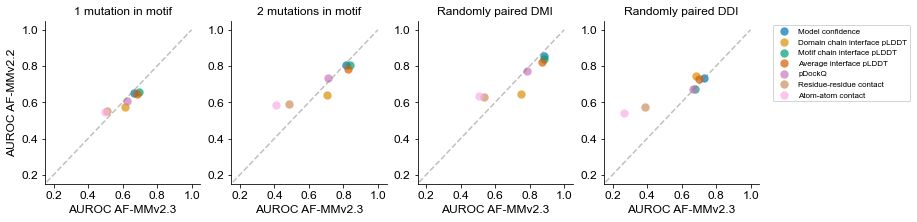

In [32]:
agg = {
    'model_confidence':max,
    'chainA_intf_avg_plddt':max,
    'chainB_intf_avg_plddt':max,
    'intf_avg_plddt':max,
    'pDockQ':max,
    'num_res_res_contact':max,
    'num_atom_atom_contact':max,
    'label':max
      }

better_name = {'model_confidence':'Model confidence',
               'chainA_intf_avg_plddt':'Domain chain interface pLDDT',
               'chainB_intf_avg_plddt':'Motif chain interface pLDDT',
               'intf_avg_plddt':'Average interface pLDDT',
               'pDockQ':'pDockQ',
               'num_res_res_contact':'Residue-residue contact',
               'num_atom_atom_contact':'Atom-atom contact'}

temp_1mut = final_df[(final_df['num_mutation_in_motif'] == 'known minimal') | (final_df['num_mutation_in_motif'] == 1)]
temp_2mut = final_df[(final_df['num_mutation_in_motif'] == 'known minimal') | (final_df['num_mutation_in_motif'] == 2)]
temp_min_random = final_df[(final_df['num_mutation_in_motif'] == 'known minimal') | (final_df['num_mutation_in_motif'] == 'random minimal')]
temp_min_random_DDI = final_df[(final_df['num_mutation_in_motif'] == 'approved minimal DDI') | (final_df['num_mutation_in_motif'] == 'random minimal DDI')]
# temp_ext_random = final_df[(final_df['num_mutation_in_motif'] == 'known extension') | (final_df['num_mutation_in_motif'] == 'random extension')]

temp_1mut = temp_1mut.groupby(['version','prediction_name']).agg(agg).reset_index()
temp_2mut = temp_2mut.groupby(['version','prediction_name']).agg(agg).reset_index()
temp_min_random = temp_min_random.groupby(['version','prediction_name']).agg(agg).reset_index()
temp_min_random_DDI = temp_min_random_DDI.groupby(['version','prediction_name']).agg(agg).reset_index()

data = []

for RRS_type, df in zip(['1 mutation','2 mutations','Randomly paired DMI', 'Randomly paired DDI'],
                        [temp_1mut,temp_2mut,temp_min_random,temp_min_random_DDI]):
    for metric in list(agg)[:-1]:
        aucs = []
        for version in ['v2.2','v2.3']:
            sel_df = df[df['version'] == version].copy()
            fpr, tpr, thresholds = roc_curve(sel_df['label'],sel_df[metric])
            if agg.get(metric) == min:
                tpr = [sum(sel_df[(sel_df['label'] == 1)][metric] <= t) / len(sel_df[(sel_df['label'] == 1)]) for t in thresholds[::-1]]
                fpr = [sum(sel_df[(sel_df['label'] == 0)][metric] <= t) / len(sel_df[(sel_df['label'] == 0)]) for t in thresholds[::-1]]
            aucs.append(auc(fpr,tpr))
        data.append([RRS_type,metric,aucs[0],aucs[1]])
auc_df = pd.DataFrame(data)
auc_df.columns = ['RRS_type','metric','AUC_v2.2','AUC_v2.3']

# make the plot
fig, ((ax1,ax2,ax3,ax4)) = plt.subplots(nrows=1,ncols=4,figsize=(4*3.2,1*3))

# Adjust the padding between subplots
plt.subplots_adjust(hspace=0.3)

for RRS_type, ax in zip(auc_df['RRS_type'].unique(),[ax1,ax2,ax3,ax4]):
    sel_df = auc_df[auc_df['RRS_type'] == RRS_type].copy()
    for i, metric in enumerate(sel_df['metric'].unique()):
        temp = sel_df[sel_df['metric'] == metric].copy()
        x = temp['AUC_v2.3'].values[0]
        y = temp['AUC_v2.2'].values[0]
        ax.scatter(x,y,color=f"C{i}",label=better_name.get(metric),alpha=0.7,s=70,linewidths=0)
        ax.set_xlabel('AUROC AF-MMv2.3',fontsize=global_fontsize)
        
for ax in [ax1,ax2,ax3,ax4]:
    ax.set_ylim([0.15,1.05])
    ax.set_xlim([0.15,1.05])
    ax.plot([0,1],[0,1], color='grey', linestyle = '--', alpha=0.5)
    modify_ticks_and_labels(ax=ax,y_major_multiple=0.2,y_minor_multiple=0.2,
                            x_major_multiple=0.2,x_minor_multiple=0.2)

ax1.set_title('1 mutation in motif',fontsize=global_fontsize)
ax2.set_title('2 mutations in motif',fontsize=global_fontsize)
ax3.set_title('Randomly paired DMI',fontsize=global_fontsize)
ax4.set_title('Randomly paired DDI',fontsize=global_fontsize)

ax1.set_ylabel('AUROC AF-MMv2.2',fontsize=global_fontsize)
ax3.legend(loc='upper right',bbox_to_anchor=(3.2,1),fontsize=legend_fontsize)

plt.savefig(f'{save_path}metrics_1mut_2mut_rand_min_DDI_AUROC.pdf',transparent=True,bbox_inches='tight')
plt.savefig(f'{save_path}metrics_1mut_2mut_rand_min_DDI_AUROC.jpeg',transparent=True,dpi=300,
            bbox_inches='tight')

In [33]:
# export data for publication
auc_df.to_csv('/Volumes/imb-luckgr/manuscripts/AlphaFold_paper/tables/MMv2.2_v2.3_AUROC.tsv',
             sep='\t',index=None)

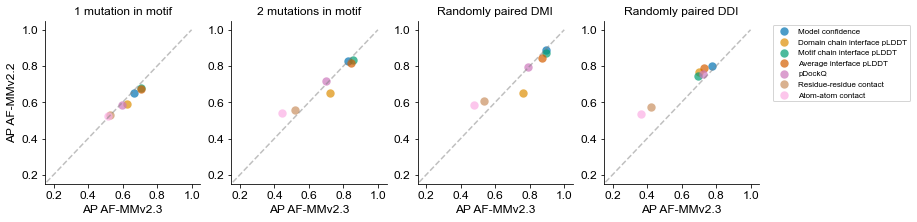

In [37]:
agg = {
    'model_confidence':max,
    'chainA_intf_avg_plddt':max,
    'chainB_intf_avg_plddt':max,
    'intf_avg_plddt':max,
    'pDockQ':max,
    'num_res_res_contact':max,
    'num_atom_atom_contact':max,
    'label':max
      }

better_name = {'model_confidence':'Model confidence',
               'chainA_intf_avg_plddt':'Domain chain interface pLDDT',
               'chainB_intf_avg_plddt':'Motif chain interface pLDDT',
               'intf_avg_plddt':'Average interface pLDDT',
               'pDockQ':'pDockQ',
               'num_res_res_contact':'Residue-residue contact',
               'num_atom_atom_contact':'Atom-atom contact'}

temp_1mut = final_df[(final_df['num_mutation_in_motif'] == 'known minimal') | (final_df['num_mutation_in_motif'] == 1)]
temp_2mut = final_df[(final_df['num_mutation_in_motif'] == 'known minimal') | (final_df['num_mutation_in_motif'] == 2)]
temp_min_random = final_df[(final_df['num_mutation_in_motif'] == 'known minimal') | (final_df['num_mutation_in_motif'] == 'random minimal')]
temp_min_random_DDI = final_df[(final_df['num_mutation_in_motif'] == 'approved minimal DDI') | (final_df['num_mutation_in_motif'] == 'random minimal DDI')]
# temp_ext_random = final_df[(final_df['num_mutation_in_motif'] == 'known extension') | (final_df['num_mutation_in_motif'] == 'random extension')]

temp_1mut = temp_1mut.groupby(['version','prediction_name']).agg(agg).reset_index()
temp_2mut = temp_2mut.groupby(['version','prediction_name']).agg(agg).reset_index()
temp_min_random = temp_min_random.groupby(['version','prediction_name']).agg(agg).reset_index()
temp_min_random_DDI = temp_min_random_DDI.groupby(['version','prediction_name']).agg(agg).reset_index()

data = []

for RRS_type, df in zip(['1 mutation','2 mutations','Randomly paired DMI', 'Randomly paired DDI'],
                        [temp_1mut,temp_2mut,temp_min_random,temp_min_random_DDI]):
    for metric in list(agg)[:-1]:
        aps = []
        for version in ['v2.2','v2.3']:
            sel_df = df[df['version'] == version].copy()
            precision, recall, thresholds = precision_recall_curve(sel_df['label'],sel_df[metric])
            if agg.get(metric) == min:
                recall = [sum(sel_df[(sel_df['label'] == 1)][metric] <= t) / len(sel_df[(sel_df['label'] == 1)]) for t in thresholds[::-1]]
                precision = [sum(sel_df[(sel_df['label'] == 1)][metric] <= t) / sum(sel_df[metric] <= t) for t in thresholds[::-1]]
            aps.append(auc(recall,precision))
        data.append([RRS_type,metric,aps[0],aps[1]])
ap_df = pd.DataFrame(data)
ap_df.columns = ['RRS_type','metric','AP_v2.2','AP_v2.3']

# make the plot
fig, ((ax1,ax2,ax3,ax4)) = plt.subplots(nrows=1,ncols=4,figsize=(4*3.2,1*3))

# Adjust the padding between subplots
plt.subplots_adjust(hspace=0.3)

for RRS_type, ax in zip(ap_df['RRS_type'].unique(),[ax1,ax2,ax3,ax4]):
    sel_df = ap_df[auc_df['RRS_type'] == RRS_type].copy()
    for i, metric in enumerate(sel_df['metric'].unique()):
        temp = sel_df[sel_df['metric'] == metric].copy()
        x = temp['AP_v2.3'].values[0]
        y = temp['AP_v2.2'].values[0]
        ax.scatter(x,y,color=f"C{i}",label=better_name.get(metric),alpha=0.7,s=70,linewidths=0)
        ax.set_xlabel('AP AF-MMv2.3',fontsize=global_fontsize)
        
for ax in [ax1,ax2,ax3,ax4]:
    ax.set_ylim([0.15,1.05])
    ax.set_xlim([0.15,1.05])
    ax.plot([0,1],[0,1], color='grey', linestyle = '--', alpha=0.5)
    modify_ticks_and_labels(ax=ax,y_major_multiple=0.2,y_minor_multiple=0.2,
                            x_major_multiple=0.2,x_minor_multiple=0.2)

ax1.set_title('1 mutation in motif',fontsize=global_fontsize)
ax2.set_title('2 mutations in motif',fontsize=global_fontsize)
ax3.set_title('Randomly paired DMI',fontsize=global_fontsize)
ax4.set_title('Randomly paired DDI',fontsize=global_fontsize)

ax1.set_ylabel('AP AF-MMv2.2',fontsize=global_fontsize)
ax3.legend(loc='upper right',bbox_to_anchor=(3.2,1),fontsize=legend_fontsize)

plt.savefig(f'{save_path}metrics_1mut_2mut_rand_min_DDI_AP.pdf',transparent=True,bbox_inches='tight')
plt.savefig(f'{save_path}metrics_1mut_2mut_rand_min_DDI_AP.jpeg',transparent=True,dpi=300,
            bbox_inches='tight')

In [36]:
# export data for publication
ap_df.to_csv('/Volumes/imb-luckgr/manuscripts/AlphaFold_paper/tables/MMv2.2_v2.3_AP.tsv',
             sep='\t',index=None)